Dataset: https://www.kaggle.com/datasets/muhammadbinimran/housing-price-prediction-data

In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [52]:
import sklearn
print(sklearn.__version__)

1.2.2


In [33]:
df = pd.read_csv('/kaggle/input/housing-price-prediction-data/housing_price_dataset.csv')
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [35]:
df.isna().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [36]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [37]:
df.nunique()

SquareFeet       2000
Bedrooms            4
Bathrooms           3
Neighborhood        3
YearBuilt          72
Price           50000
dtype: int64

In [38]:
maped = df.Neighborhood.map({
    'Rural':0,
    'Suburb':1,
    'Urban':2
})
df['maped_neig'] = maped
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,maped_neig
0,2126,4,1,Rural,1969,215355.283618,0
1,2459,3,2,Rural,1980,195014.221626,0
2,1860,2,1,Suburb,1970,306891.012076,1
3,2294,2,1,Urban,1996,206786.787153,2
4,2130,5,2,Suburb,2001,272436.239065,1


In [39]:
data = df.copy()
data.drop('Neighborhood',axis=1,inplace=True)

<Axes: >

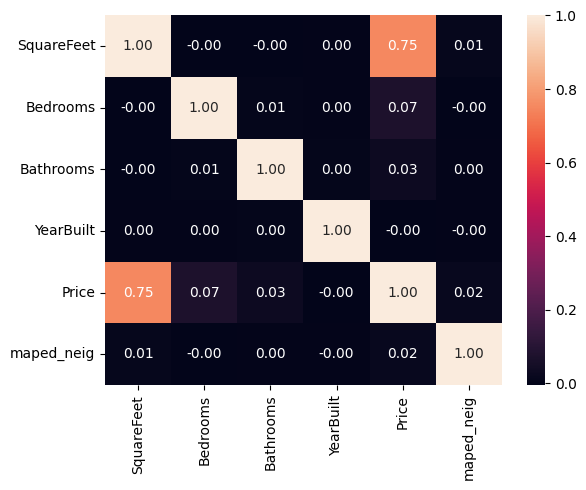

In [40]:
sns.heatmap(data.corr(),annot=True,fmt='.2f')

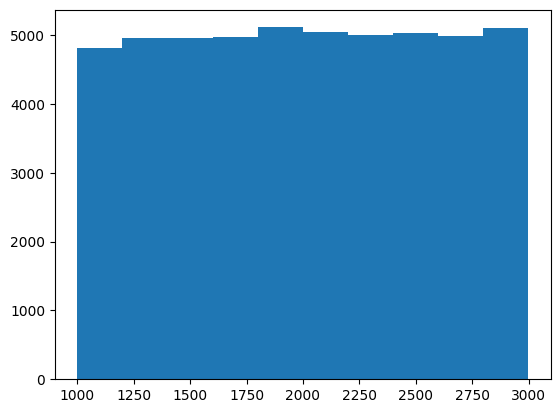

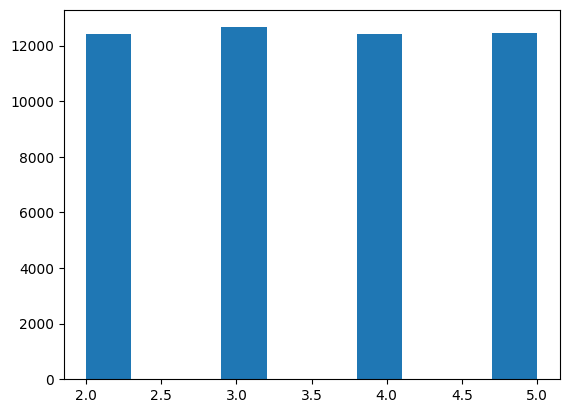

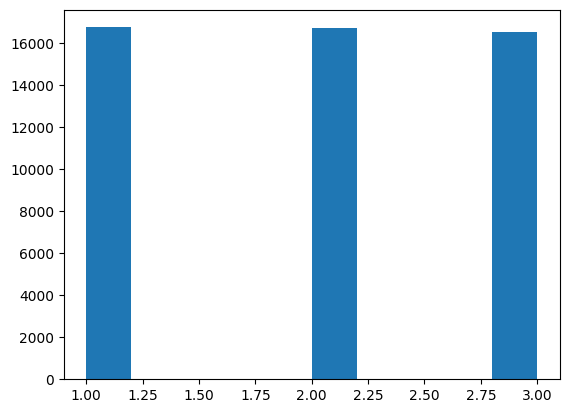

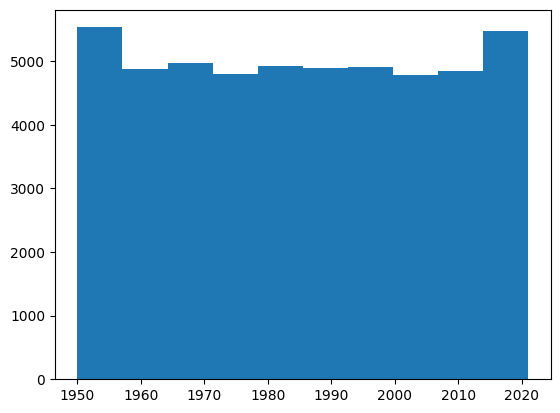

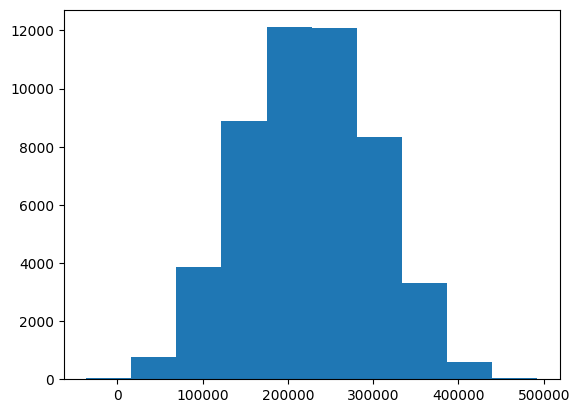

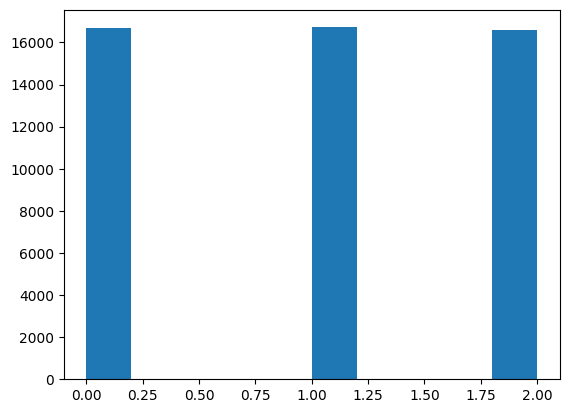

In [41]:
for i in data.columns:
    plt.hist(data[i],bins=10)
    plt.show()

In [ ]:
sns.pairplot(data)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

In [43]:
X = data.drop('Price',axis=1)
y = data['Price']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [46]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [47]:
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 2821776467.9263053
R-squared Score: 0.5117653019781603


In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 2468771544.275626
R-squared Score: 0.5728435816568727


In [51]:
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Ridge': (Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
    'Lasso': (Lasso(), {'alpha': [0.1, 1.0, 10.0]}),
    'Support Vector Regression': (SVR(), {'kernel': ['linear', 'rbf'], 'C': [0.1, 1.0, 10.0]}),
    'Random Forest': (RandomForestRegressor(), {'n_estimators': [50, 100, 200]})
}

results = {}
for name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    results[name] = {
        'Best Parameters': grid_search.best_params_,
        'Best Score (R-squared)': grid_search.best_score_
    }

KeyboardInterrupt: 

In [ ]:
for name, result in results.items():
    print(name)
    print("Best Parameters:", result['Best Parameters'])
    print("Best Score (R-squared):", result['Best Score (R-squared)'])
    print()

In [ ]:
# import pickle

# with open('best_model.pkl', 'wb') as f:
#     pickle.dump(grid_search.best_estimator_, f)
    
# with open('scaler.pkl', 'wb') as f:
#     scaler = pickle.dump(scaler,f)